## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [20]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

import math
import statistics
import seaborn as sns
from IPython.display import display
%matplotlib inline

import sklearn
from sklearn import preprocessing
from sklearn.metrics.pairwise import nan_euclidean_distances
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
print(sklearn.__version__)

import random

0.24.1


## 讀入資料

In [21]:
df_train = pd.read_csv("Titanic_train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 觀察 Age

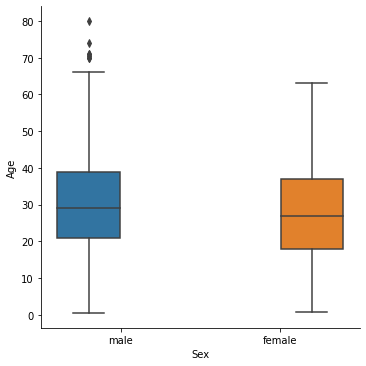

In [22]:
g = sns.catplot(x="Sex", y="Age", hue="Sex",
               data=df_train,kind="box")


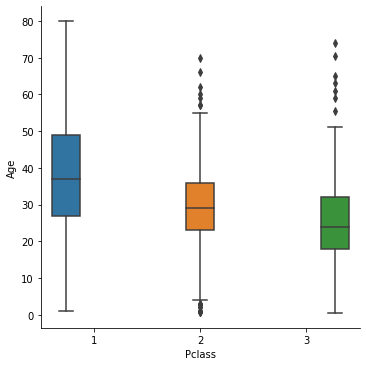

In [23]:
g = sns.catplot(x="Pclass", y="Age", hue="Pclass",
               data=df_train,kind="box")


In [24]:
m_data = df_train.copy()
le = preprocessing.LabelEncoder()
m_data['Sex']=le.fit_transform(m_data['Sex'])
display(m_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [25]:
m_data.drop(['Name','Ticket','Cabin','Embarked','PassengerId'],axis=1,inplace=True)
m_data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


In [26]:
missing_index=m_data["Age"].isnull()
display(m_data[missing_index.values==True])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
5,0,3,1,NaN,0,0,8.4583
17,1,2,1,NaN,0,0,13.0000
19,1,3,0,NaN,0,0,7.2250
26,0,3,1,NaN,0,0,7.2250
28,1,3,0,NaN,0,0,7.8792
...,...,...,...,...,...,...,...
859,0,3,1,NaN,0,0,7.2292
863,0,3,0,NaN,8,2,69.5500
868,0,3,1,NaN,0,0,9.5000
878,0,3,1,NaN,0,0,7.8958


## Age 相關 PClass = 0.369
## Age 相關 Sex = 0.093254

In [27]:
display(pd.DataFrame(nan_euclidean_distances(m_data)))

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,66.047434,4.410853,47.720253,13.062925,1.694104,54.947931,24.415786,6.861488,24.244358,...,11.064224,3.559681,6.968680,3.168596,28.187154,7.750000,23.098972,17.663899,23.228485,10.062306
1,66.047434,0.000000,64.523439,18.429118,63.359689,67.918903,25.222361,61.869810,61.221095,47.701888,...,63.639415,62.885449,61.632861,65.588999,42.536129,59.345961,45.456692,51.767384,43.015240,63.870809
2,4.410853,64.523439,0.000000,46.117032,9.111291,1.632527,52.158450,27.584824,3.910651,25.227692,...,7.141488,4.870001,3.691968,1.940522,25.385823,5.454872,23.244475,16.976353,22.187961,6.166898
3,47.720253,18.429118,46.117032,0.000000,45.127625,48.303157,19.118876,46.104237,42.827607,31.182432,...,45.325707,44.590778,43.217589,47.197484,24.935930,40.939101,28.117788,32.189174,24.831633,45.526064
4,13.062925,63.359689,9.111291,45.127625,0.000000,0.441014,47.796811,35.618122,8.916655,30.494518,...,2.005936,13.269688,7.483482,10.049876,22.048937,9.460576,27.272743,16.843001,23.828607,3.014963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,7.750000,59.345961,5.454872,40.939101,9.460576,5.023101,47.331743,26.480287,3.237988,21.527011,...,7.940583,5.759061,2.692582,6.356296,20.760916,0.000000,18.867962,11.643435,17.088007,7.318641
887,23.098972,45.456692,23.244475,28.117788,27.272743,23.417635,41.291269,19.612639,20.687010,5.196635,...,26.279187,19.839329,21.546461,23.847484,20.754894,18.867962,0.000000,7.856181,7.071068,25.885565
888,17.663899,51.767384,16.976353,32.189174,16.843001,16.407607,30.878501,3.685204,13.390965,7.625013,...,17.007508,14.176811,14.276540,17.910518,7.017114,11.643435,7.856181,0.000000,7.930085,17.163090
889,23.228485,43.015240,22.187961,24.831633,23.828607,23.392712,35.538274,25.897020,19.129882,12.124562,...,23.293683,20.039935,19.653244,23.080349,14.169179,17.088007,7.071068,7.930085,0.000000,23.153024


## k=3, weight=distance

In [28]:
value_neighbors=3

imputer = KNNImputer(n_neighbors=value_neighbors, weights="distance")
n_data = pd.DataFrame(imputer.fit_transform(m_data))

In [29]:
display(m_data[missing_index.values==True])
display(n_data[missing_index.values==True])


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
5,0,3,1,NaN,0,0,8.4583
17,1,2,1,NaN,0,0,13.0000
19,1,3,0,NaN,0,0,7.2250
26,0,3,1,NaN,0,0,7.2250
28,1,3,0,NaN,0,0,7.8792
...,...,...,...,...,...,...,...
859,0,3,1,NaN,0,0,7.2292
863,0,3,0,NaN,8,2,69.5500
868,0,3,1,NaN,0,0,9.5000
878,0,3,1,NaN,0,0,7.8958


,0,1,2,3,4,5,6
5,0.0,3.0,1.0,22.689195,0.0,0.0,8.4583
17,1.0,2.0,1.0,35.666667,0.0,0.0,13.0000
19,1.0,3.0,0.0,15.000000,0.0,0.0,7.2250
26,0.0,3.0,1.0,38.500000,0.0,0.0,7.2250
28,1.0,3.0,0.0,19.000000,0.0,0.0,7.8792
...,...,...,...,...,...,...,...
859,0.0,3.0,1.0,24.666667,0.0,0.0,7.2292
863,0.0,3.0,0.0,38.379379,8.0,2.0,69.5500
868,0.0,3.0,1.0,24.000000,0.0,0.0,9.5000
878,0.0,3.0,1.0,33.000000,0.0,0.0,7.8958


### 計算MSE

In [30]:
c1_data=m_data.dropna()
c1_data=c1_data.reset_index(drop=True)
display(c1_data)

a = random.sample(list(c1_data.index),5) 
cm1_data=c1_data.copy()
cm1_data['Age'].iloc[a]=np.nan
cm1_missing=cm1_data["Age"].isnull()
display(cm1_data[cm1_missing])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
709,0,3,0,39.0,0,5,29.1250
710,0,2,1,27.0,0,0,13.0000
711,1,1,0,19.0,0,0,30.0000
712,1,1,1,26.0,0,0,30.0000


/home/zach/myp3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
135,0,3,1,NaN,0,0,56.4958
153,1,3,0,NaN,1,0,7.8542
266,0,1,1,NaN,0,0,28.5000
554,0,3,1,NaN,0,0,7.6500
602,1,2,1,NaN,1,1,14.5000


In [31]:
verify_impute = pd.DataFrame(imputer.fit_transform(cm1_data))
verify_impute.rename(columns={0:'Survived',1:'Pclass',2:'Sex',3:'Age',4:'SibSp',5:'Parch',6:'Fare'},inplace=True)
display(verify_impute)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...
709,0.0,3.0,0.0,39.0,0.0,5.0,29.1250
710,0.0,2.0,1.0,27.0,0.0,0.0,13.0000
711,1.0,1.0,0.0,19.0,0.0,0.0,30.0000
712,1.0,1.0,1.0,26.0,0.0,0.0,30.0000


In [32]:
MSE_1=mean_squared_error(c1_data['Age'], verify_impute['Age'])
print(MSE_1)

1.6467399241406289


## 排除低相關屬性取得neighbors: Survived, Sex, Parch, Fare 

In [33]:
m2_data = m_data.drop(['Survived', 'Sex', 'Parch', 'Fare'],axis=1)
m2_data.corr()

,Pclass,Age,SibSp
Pclass,1.000000,-0.369226,0.083081
Age,-0.369226,1.000000,-0.308247
SibSp,0.083081,-0.308247,1.000000


In [34]:
value_neighbors=3
imputer = KNNImputer(n_neighbors=value_neighbors, weights="distance")
n2_data = pd.DataFrame(imputer.fit_transform(m2_data))

In [35]:
display(m2_data[missing_index.values==True])
display(n2_data[missing_index.values==True])


,Pclass,Age,SibSp
5,3,NaN,0
17,2,NaN,0
19,3,NaN,0
26,3,NaN,0
28,3,NaN,0
...,...,...,...
859,3,NaN,0
863,3,NaN,8
868,3,NaN,0
878,3,NaN,0


,0,1,2
5,3.0,29.333333,0.0
17,2.0,41.333333,0.0
19,3.0,29.333333,0.0
26,3.0,29.333333,0.0
28,3.0,29.333333,0.0
...,...,...,...
859,3.0,29.333333,0.0
863,3.0,9.333333,8.0
868,3.0,29.333333,0.0
878,3.0,29.333333,0.0


### 計算MSE

In [36]:
c2_data=m_data.dropna()
c2_data=c2_data.reset_index(drop=True)
display(c2_data)

a = random.sample(list(c2_data.index),5) 
cm2_data=c2_data.copy()
cm2_data['Age'].iloc[a]=np.nan
cm2_missing=cm2_data["Age"].isnull()
display(cm2_data[cm2_missing])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
709,0,3,0,39.0,0,5,29.1250
710,0,2,1,27.0,0,0,13.0000
711,1,1,0,19.0,0,0,30.0000
712,1,1,1,26.0,0,0,30.0000


/home/zach/myp3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
47,0,1,1,NaN,1,0,83.4750
132,0,3,1,NaN,4,1,39.6875
256,1,1,0,NaN,1,1,134.5000
348,1,1,0,NaN,1,2,120.0000
681,1,1,0,NaN,0,1,39.4000


In [37]:
verify_impute = pd.DataFrame(imputer.fit_transform(cm2_data))
verify_impute.rename(columns={0:'Survived',1:'Pclass',2:'Sex',3:'Age',4:'SibSp',5:'Parch',6:'Fare'},inplace=True)
display(verify_impute)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...
709,0.0,3.0,0.0,39.0,0.0,5.0,29.1250
710,0.0,2.0,1.0,27.0,0.0,0.0,13.0000
711,1.0,1.0,0.0,19.0,0.0,0.0,30.0000
712,1.0,1.0,1.0,26.0,0.0,0.0,30.0000


In [38]:
MSE_2=mean_squared_error(c2_data['Age'], verify_impute['Age'])
print(MSE_2)

2.1435243156390578


## 排除低相關屬性補值,讓MSE大幅下降